# S4- CASO PRACTICO-BDD FINAL

### Nombre: Stalin Carrión Pardo.

1. Importe la base de datos a una base en Jupyter Notebook con pandas. 
2. Obtenga los descriptivos resumen de la base de datos e identifique a las variables numéricas y categóricas. ¿Hay algo que le llame la atención? 
3. Evalúe si la base contiene datos perdidos.
4. Evalúe si alguna de las variables contiene datos atípicos (outliers) 
   * De ser el caso, detalle cuáles y qué método estadístico aplicarán para corregir. 
5. Grafique las distribuciones de las variables y a priori comente sobre ellas. 
6. Obtenga las correlaciones entre los datos de corte numérico. 
7. Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.
8. Indique que tipo de modelación realizarán y porqué. 
9. Verifique los supuestos, de haber escogido el enfoque econométrico. 
10. Obtenga el modelo definitivo, prediga los valores y comente el grado de ajuste del modelo. Justifique con métricas su respuesta.
11. Grafique a los valores predicho de modelo vs los valores reales.
 * ¿Cómo se ven una vez graficados frente a los valores reales? Argumente su respuesta. 
12. Concluya sobre su modelo. Para ello, si escogió el enfoque econométrico, interprete coeficientes, por el contrario si escogió el enfoque de machine learning, determine cuáles son las variables que tienen mayor poder explicativo sobre su variable objetivo. 
13. Suba su proyecto final en su cuenta de Github y adjunte una captura de pantalla en esta plataforma. 

## DESARROLLO:

## 1. Importe la base de datos a una base en Jupyter Notebook con pandas. 

In [1]:
# SE IMPORTA LAS LIBRERIAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# PARA REGRESION Y VALIDACION DE SUPUESTOS LLAMAMOS A STATSMODEL
import statsmodels.api as sm
import statsmodels.formula.api as sms

In [3]:
df=pd.read_csv("Walmart(1).csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


### Recodificar el nombre de las columnas a español

In [4]:
df.rename({'Store':'Tienda', 'Date': 'Fecha', 'Weekly_Sales': 'Ventas_Tienda', 'Holiday_Flag': 'Bandera_Semana', 
           'Temperature': 'Temperatura', 'Fuel_Price': 'Precio_Combustible', 'CPI': 'CPI', 'Unemployment': 'Desempleo'
          }, axis=1, inplace=True)
df

,Tienda,Fecha,Ventas_Tienda,Bandera_Semana,Temperatura,Precio_Combustible,CPI,Desempleo
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


## 2. Obtenga los descriptivos resumen de la base de datos e identifique a las variables numéricas y categóricas. ¿Hay algo que le llame la atención? 

In [5]:
# Descripción de variables numéricas:
df.describe() 

,Tienda,Ventas_Tienda,Bandera_Semana,Temperatura,Precio_Combustible,CPI,Desempleo
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
# Descripción de variables cualitativas:
df.describe(include = 'object')

,Fecha
count,6435
unique,143
top,05-02-2010
freq,45


Existe una sola  variavle categórica.
* A continuación se presenta una forma más clásica de mostrar datos categóricos: un gráfico de barras

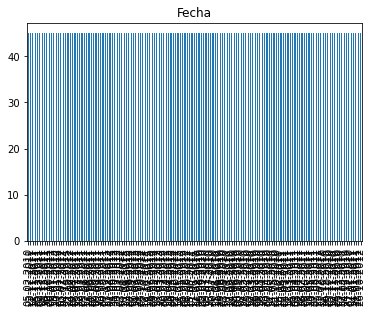

In [7]:
for i in df.select_dtypes(['object']).columns.difference(['modelo']):
    if df[i].dtype=='object':
        df[i].value_counts().plot(kind='bar', title=str(i))
        plt.show()

In [8]:
df.dtypes

Tienda                  int64
Fecha                  object
Ventas_Tienda         float64
Bandera_Semana          int64
Temperatura           float64
Precio_Combustible    float64
CPI                   float64
Desempleo             float64
dtype: object

¿Hay algo que le llame la atención?
* Existen 45 tiendas.
* El valor de las ventas es bastante alto.
* La tasa de desempleo es bastante alta.

## 3. Evalúe si la base contiene datos perdidos.

In [9]:
# Revisar datos perdidos:
df.isna().sum() 

Tienda                0
Fecha                 0
Ventas_Tienda         0
Bandera_Semana        0
Temperatura           0
Precio_Combustible    0
CPI                   0
Desempleo             0
dtype: int64

Observado el resultado anterior, se puede verificar que no existen valores perdidos.

## 4. Evalúe si alguna de las variables contiene datos atípicos (outliers)
###   * De ser el caso, detalle cuáles y qué método estadístico aplicarán para corregir.

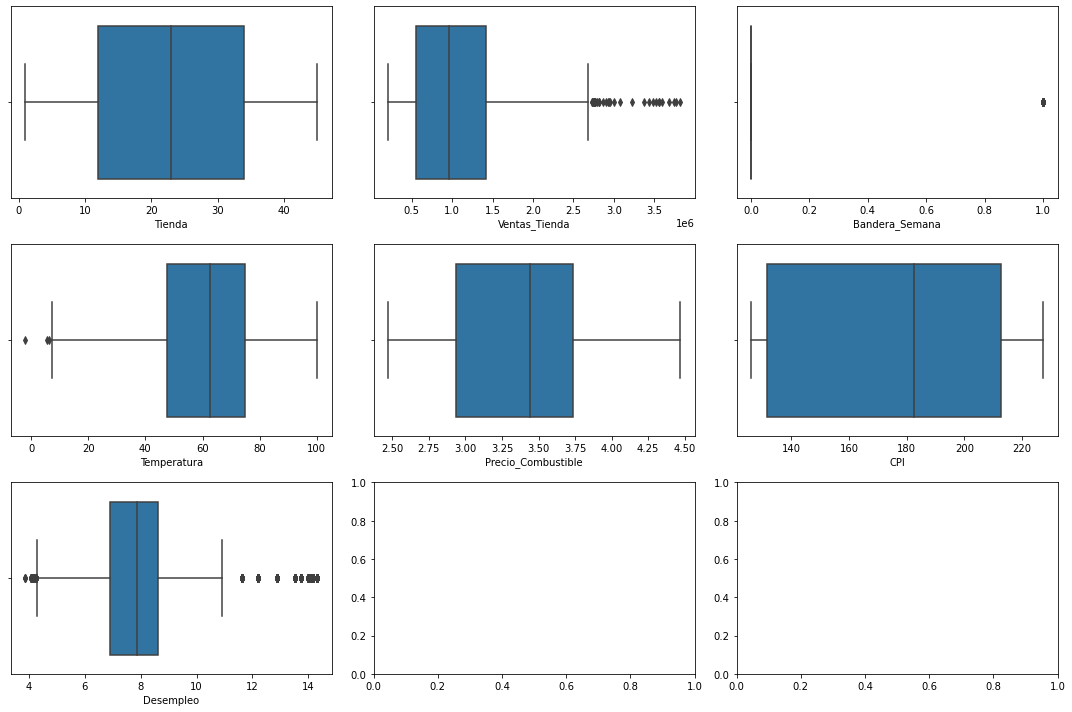

In [10]:
fig, axs = plt.subplots(3,3, figsize = (15,10))
plt1 = sns.boxplot(df['Tienda'], ax = axs[0,0]) # Número de la tienda.
plt2 = sns.boxplot(df['Ventas_Tienda'], ax = axs[0,1]) # Ventas para la tienda dada.
plt3 = sns.boxplot(df['Bandera_Semana'], ax = axs[0,2]) # 1 Semana de vacaciones, 0 semana no festiva.
plt4 = sns.boxplot(df['Temperatura'], ax = axs[1,0]) # Temperatura del día de la venta.
plt5 = sns.boxplot(df['Precio_Combustible'], ax = axs[1,1]) # Costo del combustible en la región.
plt6 = sns.boxplot(df['CPI'], ax = axs[1,2]) # Índice de precios al consumidor vigente
plt7 = sns.boxplot(df['Desempleo'], ax = axs[2,0]) # Tasa de desempleo predominante.
plt.tight_layout()

De acuerdo con el resultado anterior, se puede visualizar que las variables cuantitativas con datos atipicos son Ventas_Tienda, Bandera_Semana, Temperatura y Desempleo. El método estádistico que se utilizara para la remocion de datos atipicos sera el IQR.

In [11]:
#IQR Para retiro de datos atipicos de la variable Ventas_Tienda
Q1 = df['Ventas_Tienda'].quantile(0.25)
Q3 = df['Ventas_Tienda'].quantile(0.75)
IQR_Ventas_Tienda = Q3 - Q1  #rango intercuartil
print('\nIQR_Ventas_Tienda: ',IQR_Ventas_Tienda)

# Retiro de datos atipicos de la variable Ventas_Tienda
df = df[~((df['Ventas_Tienda'] < (Q1 - 1.5 * IQR_Ventas_Tienda)) |(df['Ventas_Tienda'] > (Q3 + 1.5 * IQR_Ventas_Tienda)))]
print ('\nDatos removidos de la variable Ventas_Tienda: ', df.shape)


IQR_Ventas_Tienda:  866808.5549999999

Datos removidos de la variable Ventas_Tienda:  (6401, 8)


In [12]:
#IQR Para retiro de datos atipicos de la variable Bandera_Semana
Q1 = df['Bandera_Semana'].quantile(0.25)
Q3 = df['Bandera_Semana'].quantile(0.75)
IQR_Bandera_Semana = Q3 - Q1  #rango intercuartil
print('\nIQR_Bandera_Semana: ',IQR_Bandera_Semana)

# Retiro de datos atipicos de la variable Bandera_Semana
df = df[~((df['Bandera_Semana'] < (Q1 - 1.5 * IQR_Bandera_Semana)) |(df['Bandera_Semana'] > (Q3 + 1.5 * IQR_Bandera_Semana)))]
print ('\nDatos removidos de la variable Bandera_Semana: ', df.shape)


IQR_Bandera_Semana:  0.0

Datos removidos de la variable Bandera_Semana:  (5960, 8)


In [13]:
#IQR Para retiro de datos atipicos de la variable Temperatura
Q1 = df['Temperatura'].quantile(0.25)
Q3 = df['Temperatura'].quantile(0.75)
IQR_Temperatura = Q3 - Q1  #rango intercuartil
print('\nIQR_Temperatura: ',IQR_Temperatura)

# Retiro de datos atipicos de la variable Temperatura
df = df[~((df['Temperatura'] < (Q1 - 1.5 * IQR_Temperatura)) |(df['Temperatura'] > (Q3 + 1.5 * IQR_Temperatura)))]
print ('\nDatos removidos de la variable Temperatura: ', df.shape)


IQR_Temperatura:  26.512499999999996

Datos removidos de la variable Temperatura:  (5956, 8)


In [14]:
#IQR Para retiro de datos atipicos de la variable Desempleo
Q1 = df['Desempleo'].quantile(0.25)
Q3 = df['Desempleo'].quantile(0.75)
IQR_Desempleo = Q3 - Q1  #rango intercuartil
print('\nIQR_Desempleo: ',IQR_Desempleo)

# Retiro de datos atipicos de la variable Desempleo
df = df[~((df['Desempleo'] < (Q1 - 1.5 * IQR_Desempleo)) |(df['Desempleo'] > (Q3 + 1.5 * IQR_Desempleo)))]
print ('\nDatos removidos de la variable Desempleo: ', df.shape)


IQR_Desempleo:  1.7309999999999999

Datos removidos de la variable Desempleo:  (5507, 8)


## 5. Gráfique las distribuciones de las variables y a priori comente sobre ellas.

### Variable dependiente (Y) Ventas_Tienda

<AxesSubplot:xlabel='Ventas_Tienda', ylabel='Density'>

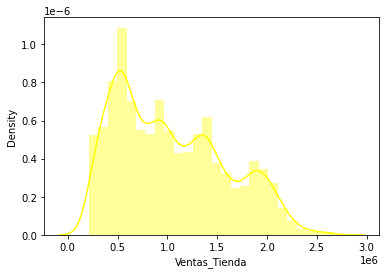

In [15]:
sns.distplot(df['Ventas_Tienda'],color="yellow")

La variable independiente X2 Ventas_Tienda se oberva que tiene un sesgo a la derecha por lo que se aplicara el metodo IQR para retirar los valores atipicos.

In [16]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df.Ventas_Tienda.quantile(0.25)
Q3 = df.Ventas_Tienda.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

871468.1


In [17]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['Ventas_Tienda'] < (Q1 - 1.5 * IQR)) |(df['Ventas_Tienda'] > (Q3 + 1.5 * IQR)))]
df.shape

(5507, 8)

<AxesSubplot:xlabel='Ventas_Tienda', ylabel='Density'>

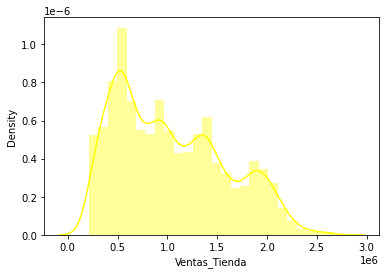

In [18]:
sns.distplot(df['Ventas_Tienda'],color="yellow")

Una vez aplicado el metodo del IQR se tiene un gráfico con una distribucion normal.

### Variable independiente X1 Tienda

<AxesSubplot:xlabel='Tienda', ylabel='Density'>

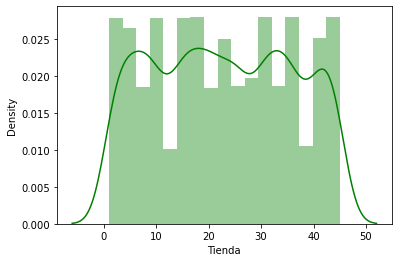

In [19]:
sns.distplot(df['Tienda'],color="green")

La variable X1 Tienda no es una distribucion normal, es una distribucion multimodal, no se aplica el metodo IQR ya que no existe sesgos pronunciados.

### Variable independiente X2 Bandera_Semana

<AxesSubplot:xlabel='Bandera_Semana', ylabel='Density'>

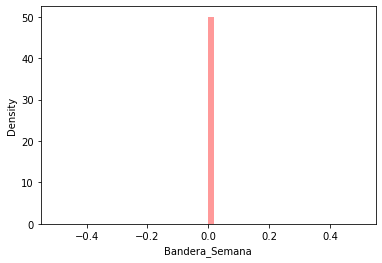

In [20]:
sns.distplot(df['Bandera_Semana'],color="red")

La variable X2 Bandera_Semana no es una distribucion normal, es una distribucion multimodal, no se aplica el metodo IQR ya que no existe sesgos pronunciados.

### Variable independiente X3 Temperatura

<AxesSubplot:xlabel='Temperatura', ylabel='Density'>

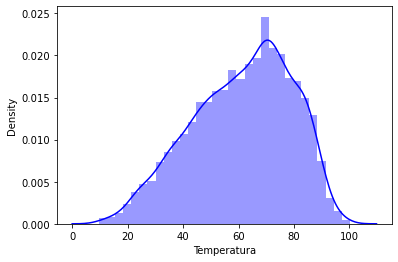

In [21]:
sns.distplot(df['Temperatura'],color="blue")

La variable independiente X3 Temperatura se oberva que tiene un sesgo a la derecha por lo que se aplicara el metodo IQR para retirar los valores atipicos.

In [22]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df.Temperatura.quantile(0.25)
Q3 = df.Temperatura.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

26.644999999999996


In [23]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['Temperatura'] < (Q1 - 1.5 * IQR)) |(df['Temperatura'] > (Q3 + 1.5 * IQR)))]
df.shape

(5507, 8)

<AxesSubplot:xlabel='Temperatura', ylabel='Density'>

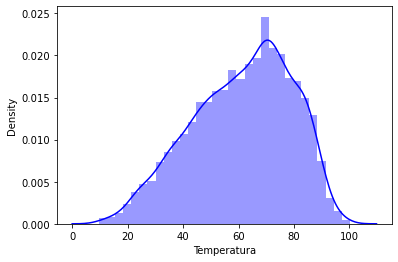

In [24]:
sns.distplot(df['Temperatura'],color="blue")

Una vez aplicado el metodo del IQR se tiene un gráfico con una distribucion normal.

### Variable independiente X4 Precio_Combustible

<AxesSubplot:xlabel='Precio_Combustible', ylabel='Density'>

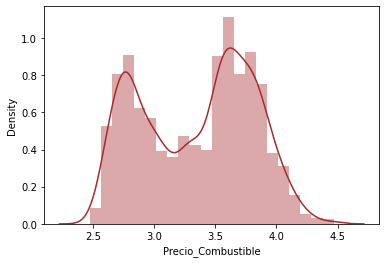

In [25]:
sns.distplot(df['Precio_Combustible'],color="brown")

La variable X4 Precio_Combustible no es una distribucion normal, es una distribucion multimodal, no se aplica el metodo IQR ya que no existe sesgos pronunciados.

### Variable independiente X5 CPI

<AxesSubplot:xlabel='Precio_Combustible', ylabel='Density'>

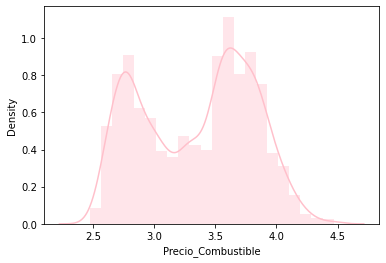

In [26]:
sns.distplot(df['Precio_Combustible'],color="pink")

La variable X5 CPI no tiene datos atipicos, no se aplica el metodo IQR ya que no existe sesgos pronunciados.

### Variable independiente X6 Desempleo

<AxesSubplot:xlabel='Desempleo', ylabel='Density'>

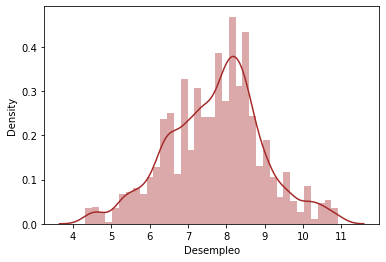

In [27]:
sns.distplot(df['Desempleo'],color="brown")

La variable independiente X6 Desempleo se oberva que tiene un sesgo a la derecha e izquierda por lo que se aplicara el metodo IQR para retirar los valores atipicos.

In [28]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df.Desempleo.quantile(0.25)
Q3 = df.Desempleo.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

1.6029999999999998


In [29]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['Desempleo'] < (Q1 - 1.5 * IQR)) |(df['Desempleo'] > (Q3 + 1.5 * IQR)))]
df.shape

(5436, 8)

<AxesSubplot:xlabel='Desempleo', ylabel='Density'>

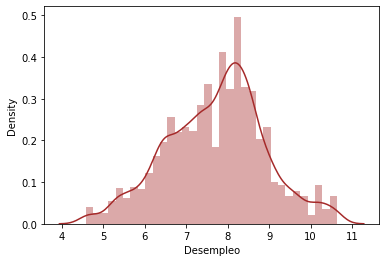

In [30]:
sns.distplot(df['Desempleo'],color="brown")

Una vez aplicado el metodo del IQR se tiene un gráfico con una distribucion normal.

## 6. Obtenga las correlaciones entre los datos de corte numérico. 

In [31]:
df.corr().style.background_gradient(cmap='coolwarm')

,Tienda,Ventas_Tienda,Bandera_Semana,Temperatura,Precio_Combustible,CPI,Desempleo
Tienda,1.000000,-0.316222,nan,-0.025456,0.046444,-0.209478,0.321092
Ventas_Tienda,-0.316222,1.000000,nan,-0.037851,0.018721,-0.079723,-0.051682
Bandera_Semana,nan,nan,nan,nan,nan,nan,nan
Temperatura,-0.025456,-0.037851,nan,1.000000,0.114122,0.235501,-0.006634
Precio_Combustible,0.046444,0.018721,nan,0.114122,1.000000,-0.131896,-0.123973
CPI,-0.209478,-0.079723,nan,0.235501,-0.131896,1.000000,-0.231608
Desempleo,0.321092,-0.051682,nan,-0.006634,-0.123973,-0.231608,1.000000


Se puede observar que las variables con mayor correlación entre si son: Ventas_Tienda, CPI y Precio_Combustible.

In [32]:
## Gráfico de variables para verificación de relación:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

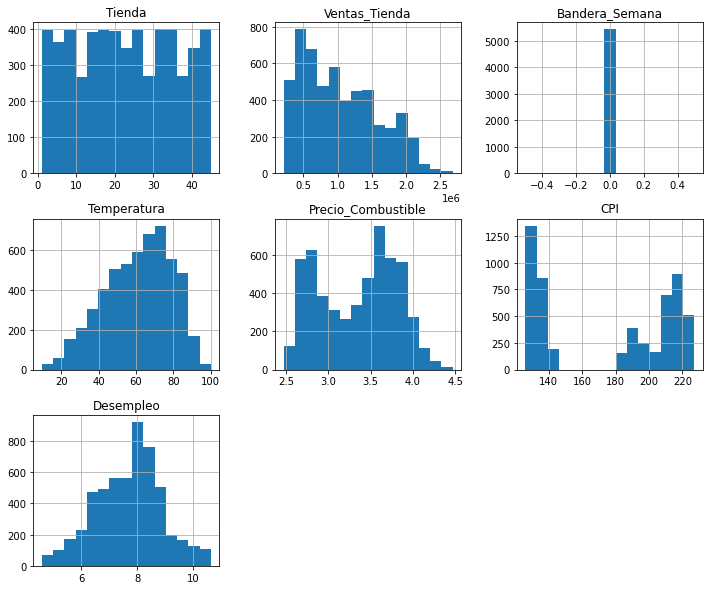

In [33]:
df[var_cuantitativas].hist(bins = 15, figsize = (12,10));

## 7. Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.

In [34]:
# Transformación de variables categóricas a numéricas:
from sklearn.preprocessing import LabelEncoder
df[var_cualitativas]=df[var_cualitativas].apply(LabelEncoder().fit_transform)
df[var_cualitativas]=df[var_cualitativas].apply(LabelEncoder().fit_transform)
df.head()

,Tienda,Fecha,Ventas_Tienda,Bandera_Semana,Temperatura,Precio_Combustible,CPI,Desempleo
0,1,19,1643690.90,0,42.31,2.572,211.096358,8.106
2,1,79,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,111,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,20,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,47,1439541.59,0,57.79,2.667,211.380643,8.106


* Variable Dependiente (Y): Ventas_Tienda
* Variable Independiente (X1): Tienda
* Variable Independiente (X2): Bandera_Semana
* Variable Independiente (X3): Temperatura
* Variable Independiente (X4): Precio_Combustible
* Variable Independiente (X5): CPI
* Variable Independiente (X6): Desempleo

En este caso se ha decidido trabajar como variable dependiente a Ventas_Tienda, debido a que varia de acuerdo a la tienda y las variables explicativas o independientes las restantes (Tienda, Bandera_Semana, Temperatura, Precio_Combustible, CPI y Desempleo) 

## 8. Indique que tipo de modelación realizarán y porqué. 

Se realizará el tipo de modelación por Machine Learning mediante Regresión Lineal por Sklearn.
Porque los algoritmos para aplicar son más flexibles que el marco econométrico, por lo que nos enfocamos en realizar predicciones varios de los supuestos mediante las técnicas de prueba denominadas Test que permite estimar el rendimiento del algoritmo basado en predicciones y la prueba de Train permite que el algoritmo "aprenda" de las relaciones entre las variables y los datos.

## 9. Verifique los supuestos, de haber escogido el enfoque econométrico. 

Para la verificación de los supuestos, haremos uso del módulo sklearn, el mismo es encargado de la modelación por Machine Learning en Python.
*- Para la regresión y validación de supuestos, instalamos y llamamos a sklearn.

<img src="Instalar_sklearn.png" width="550">

## 10. Obtenga el modelo definitivo, prediga los valores y comente el grado de ajuste del modelo. Justifique con métricas su respuesta.

In [36]:
# Inicializar el modelo: 
from sklearn.linear_model import LinearRegression

#### Recodificamos las variables categóricas con Label Encoder

In [37]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [40]:
df[var_cualitativas] = df[var_cualitativas].apply(labelencoder.fit_transform)

#### *- Separamos a los predictores de nuestra variable objetivo:

In [42]:
X = df[df.columns.difference(['Ventas_Tienda'])]
y = df.Ventas_Tienda

* Ahora vamos a realizar un train/test split, separando un 80% de los datos para la submuestra de entrenamiento y 20% para la submuestra de prueba.

In [43]:
# Primero tenemos que importar del module sklearn la función: train_test_split
from sklearn.model_selection import train_test_split

In [44]:
# Determinamos nuestra X primero en donde el 80% es para el X_Train y el 20% para el X_test.
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20,random_state =123)

In [45]:
# El siguiente script es para ver los shape y ver si la división o split se realizó de forma correcta, 
# en donde pasamos el shape a cada uno de los objetos
print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))

(4348, 7)  <class 'pandas.core.frame.DataFrame'>
(4348,) 	  <class 'pandas.core.series.Series'>
(1088, 7)  <class 'pandas.core.frame.DataFrame'>
(1088,) 	  <class 'pandas.core.series.Series'>


Luego de ejecutar el código anterior, podemos visualizar nuestro X_Train tiene 4348 observaciones y 7 columnas y es un DataFrame, para el segundo caso se tiene 4348 observaciones sin columnas de tipo Serie. Para el X_test tenemos un DataFrame de 1088 columnas y 7 columnas de tipo DataFrame y para el segundo caso 1088 observaciones sin columnas de tipo Serie.
Es importante que se tengan las mismas dimensiones de columnas tanto para el X_Train y X_Test.

* Luego que ya tenemos separadas las columnas para el X_Train y X_Test, ahora vamos a entrenar nuestro modelo, para ello debemos de realizar lo siguiente: 

#### Inicializar el modelo, para ello vamos a entrenar el modelo de regresión lineal por sklearn.
* Para ello vamos a llamar al module que importamos (LinearRegresion) e inicializar con los parentesis, para crear un objeto que sera asignado al modelo de regresión.

In [46]:
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

LinearRegression()

Ejecutado el script anterior, observamos el mensaje que el modelo ha sido inicializado correctamente.

#### * Se puede predecir con el método predict, para la base X_train y X_test.

In [48]:
predicciones_train = modelo_regresion.predict(X_train)
predicciones_test = modelo_regresion.predict(X_test)

Ejecutado el script anterior, lo que se hizo es realizar las predicciones sobre la base de entrenamiento y sobre la data que nuestro modelo no ha visto, el modelo con el fit entreno sobre la base de entrenamiento, por lo tanto las predicciones tendran mejores métricas sobre la base que no ha visto el modelo.

### El siguiente punto es realizar las métricas de evaluación

In [49]:
# Importamos la librerias de las métricas que necesitamos: 
from sklearn.metrics import mean_squared_error, mean_absolute_error

### * Vamos a cálcular el MSE (mean squared error), en este caso los dos tipos de errores.

In [51]:
MSE_train = mean_squared_error(y_train, predicciones_train)
MSE_test = mean_squared_error(y_test, predicciones_test)
print(MSE_train)
print(MSE_test)

262770054559.9018
263646274248.0717


En el código anterior lo que hicimos es pasar como argumento las predicciones, necesita la Y observada que si se vio en el entrenamiento y la Y predicha en el método predict.
* Se puede observar que el error del train es menor que el error del test, es importante que los dos errores deben estar un poco similares.

### Cálcular el RMSE (Raíz cuadrada de las métricas previamente observadas)

In [52]:
# Obtenemos la raíz cuadrada de y_train y y_test.
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print(RMSE_train)
print(RMSE_test)

512611.01681479864
513464.9688616271


El comportamiento del Train (512611.01) es menor al de Test con un valor de 513164.96

### Cálcular el MAE

In [53]:
MAE_train = mean_absolute_error(y_train, predicciones_train)
MAE_test = mean_absolute_error(y_test, predicciones_test)
print(MAE_train)
print(MAE_test)

431212.8992382359
426609.56320830074


Para cálcular el MAE, las métricas de error necesitan los y observados estan en el Train o Test y los y predichos se almacenaran de acuerdo al objeto asignado.

### Obtener el R^2

In [54]:
# Para ello se debe importar el R cuadrado como una métrica adicional: 
from sklearn.metrics import r2_score

In [55]:
r_square_train = r2_score(y_train, predicciones_train) #El primer argumento es el y observado.
r_square_test  = r2_score(y_test, predicciones_test) #El segundo argumento es el y predicho.
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train.round(4))
print('El R^2 del subconjunto de prueba es:' , r_square_test.round(4))

El R^2 del subconjunto de entrenamiento es: 0.1292
El R^2 del subconjunto de prueba es: 0.1055


De acuerdo a los resultados podemos observar el mismo comportamiento de los errores en el R cuadrado.
* Se puede observar que el R cuadrado del Train es del 12% y el R cuadrado del Test es del 10%.
Análizando los valores del modelo podemos decir que los resultados tienen una diferencia minima, dando como resultado un modelo bastante aceptable, por lo que se busca que las métricas esten bastante cercanas en cuanto a sus valores.

### Ahora vamos a imprimir los parámetros que estan dentro del modelo cálculado en la regresión lineal mediante el método intercept: 

In [56]:
# Print the Intercept:
print('intercepto:', modelo_regresion.intercept_)

# Print the Slope:
print('pendiente:', modelo_regresion.coef_) 

intercepto: 1555356.265291241
pendiente: [     0.          -1945.20848672  14128.40147712   -598.75332178
  38729.72507708   -593.10801097 -15170.61055808]


De acuerdo a los resultados observados anteriormente el método intercept permite encontrar el delta 0. El método regresion_coef, pendiente permite encontrar los coeficientes de nuestras variables explicativas.
* Los valores de incept son: 1555356.265291241
* Las variables que entraron al modelos son: 0. -1945.20848672  14128.40147712   -598.75332178 38729.72507708   -593.10801097 -15170.61055808

## 11. Grafique a los valores predicho de modelo vs los valores reales.
####    ¿Cómo se ven una vez graficados frente a los valores reales? Argumente su respuesta.

#### *- Predicciones con datos de entrenamiento:

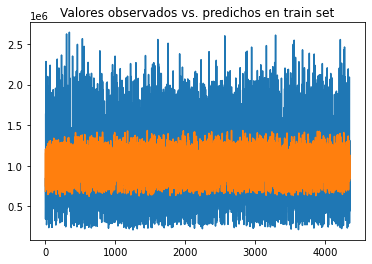

In [57]:
fig, ax = plt.subplots()
ax.plot(y_train.values) #Pasamos los valores observados reales.
ax.plot(predicciones_train) # Pasamos las predicciones del train.
plt.title("Valores observados vs. predichos en train set");

De acuerdo al gráfico visualizado anteriormente, podemos observar las diferencias entre los valores observados y los valores predichos, en donde el y_train son los valores observados que si vio el algoritmo y en predicciones_train le pasamos las predicciones para ver que tan ajustadas estan, en donde se indica que el 12% es del Train y un 10% del Test, el algoritmo devuelve las predicciones en donde el modelo lineal es bueno con los modelos que estan cerca de la media, pero si tiene bastante complejidad predecir los puntos que son bastante altos.

#### *- Predicciones con datos de prueba:

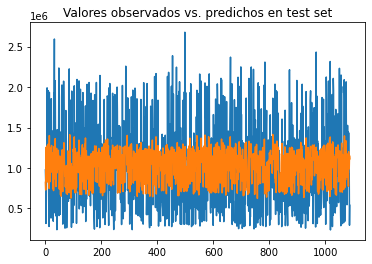

In [58]:
fig, ax = plt.subplots()
ax.plot(y_test.values) #Pasamos los valores observados reales.
ax.plot(predicciones_test) # Pasamos las predicciones del train.
plt.title("Valores observados vs. predichos en test set");

En la figura observada anteriormente equivale al Test, en donde se ve diferente al Train ya que la proporción de datos que dimos es del 20% de los datos, es un poco más claro las predicciones.

## 12. Concluya sobre su modelo. Para ello, si escogió el enfoque econométrico, interprete coeficientes, por el contrario si escogió el enfoque de machine learning, determine cuáles son las variables que tienen mayor poder explicativo sobre su variable objetivo. 

Para cálcular las variables predictoras con mayor importancia, las variables deben tener la misma escala o que hayan sido escaladas anteriormente, para ello se debe poner a todas las variables sobre la misma línea de competención de acuerdo a lo siguiente:

In [62]:
# Estándarizar las variables mediante StandardScaler:
from sklearn.preprocessing import StandardScaler

In [63]:
# Instanciar el objeto:
sc = StandardScaler()

A continuación vamos a entrenar y transformar el X_train y X_test, las variables explicativas estan en las X, solo se necesita estándarizar a las variables independientes, el método fit_transform solo se aplica al X_train, el médotodo transform solamente tranforma las variables o subconjunto X_Test pero no las entrena: 

In [68]:
# Cuando tenemos normalizaciones aplicamos fit_transform para que aprenda y estándarice basado en el conjunto de entrenamiento 
#(media, desviación standar) pero que solo transforme al subconjunto test.
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#### * Entrenar el modelo con los datos de entrenamiento

Una vez que tenemos nuestros diferentes conjuntos de datos, procedemos a entrenar sobre las variables estándarizadas, para ello ejecutamos el siguiente script: 

In [65]:
modelo_regresion_std = LinearRegression()
modelo_regresion_std.fit(X_train_std, y_train)

LinearRegression()

Observamos el mensaje que el modelo ha sido inicializado correctamente.

### Realizar las predicciones

In [66]:
predicciones_train_std = modelo_regresion_std.predict(X_train_std)
predicciones_test_std = modelo_regresion_std.predict(X_test_std)

### Evaluar el R^2

In [67]:
r_square_train_std = r2_score(y_train, predicciones_train_std)
r_square_test_std  = r2_score(y_test, predicciones_test_std)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train_std.round(4))
print('El R^2 del subconjunto de prueba es:' , r_square_test_std.round(4))

El R^2 del subconjunto de entrenamiento es: 0.1292
El R^2 del subconjunto de prueba es: 0.1055


Como se puede observar la estándarización no cambia los valores de R^2 en cuánto al R cuadrado que se obtuvo anteriormente. La estandarización no cambia los resultados.

#### Nuevamente realizamos Predicciones es el subgrupo de datos de entrenamiento: 

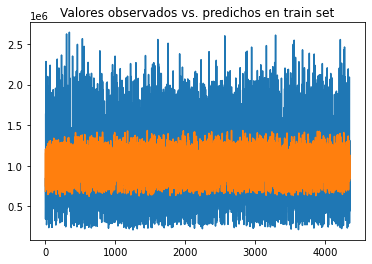

In [69]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train_std)
plt.title("Valores observados vs. predichos en train set");

### Continuamos con las Predicciones es el subgrupo de datos de prueba

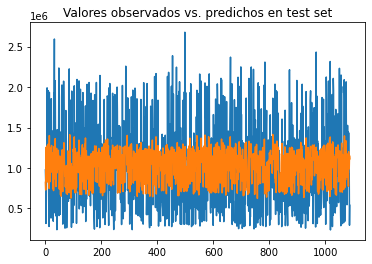

In [70]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test_std)
plt.title("Valores observados vs. predichos en test set");

### Extraer los coeficientes:

In [71]:
# Extraer las medidas de error:
importancia = modelo_regresion_std.coef_ #Asignamos el método coef que permite mostrar los coeficientes de cada variable.

Para encontrar la importancia de las variables, tomamos al modelo entrenado: modelo_regresion_std.fit(X_train_std, y_train)
Y le asignamos el método coef, en donde salen los coeficientes de cada variable, de acuerdo a lo siguiente: 

In [74]:
# Resumen
for i,v in enumerate(importancia):
    print('Variable explicativa No. %0d, Score: %.5f' % (i,v))

Variable explicativa No. 0, Score: 0.00000
Variable explicativa No. 1, Score: -75835.25094
Variable explicativa No. 2, Score: 16839.90626
Variable explicativa No. 3, Score: -22955.05564
Variable explicativa No. 4, Score: 17830.94857
Variable explicativa No. 5, Score: -10537.39791
Variable explicativa No. 6, Score: -198775.62425


Luego de estándarizar se procede a gráficar para determinar las variables con mayor pendiente o impacto:

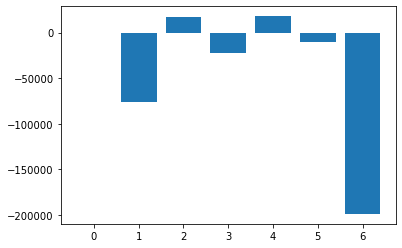

In [75]:
# Graficar la importancia o "feature importance"
plt.bar([x for x in range(len(importancia))], importancia)
plt.show()

* Luego de observar la gráfica anterior, que existen variables explicativas especificamente en la variable explicativa No. 1 con un Score de -75835.25094, variable explicativa No 3 con un Score de -22955.05564, la variable explicativa No 5 con Score de -10537.39791, y la variable No. 6 con un Score negativo de -198775.62425, esto significa que la variable explicativa hace que aumente la función de Tiendas_Venta.
* La variable No. 0 es bastante baja por lo que no altera la métrica y los resultado.
* La variable No.2 y 4 son representativas ya que tienen mayor poder explicativo.